<h1>Analysis of Unemployment in Europe and a look into the development of the Human Development Index for the UK</h1>
<p>This is an analyse of unemployment in Europe, we will use data from the last 10 years. The objective of this analyse is to have a better understanding of the data and be able to identify the unemployment rates of the countries in Europe and which ones have the highest rates, which countries have been able to provide a good employability for its citizens and the disparity between men and women, as well as the data of each country by age group and sex.
<p>To make it easier to visualise the data I have plotted some graphs that I will better explain further in this analyse.
<p>Finally, I have web scraped data from "datosmacro.expansion.com" concerning the Human Development Index of the United Kingdom in the last 10 years. By the end of this analysis, we should be able to say if the unemployment rate follows the same pattern as the HDI rates. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import *
import urllib3

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# Load dataset using Pandas
data = pd.read_csv(r'data.csv') #creates Panda dataframe to work with the data
countries = pd.read_csv(r'countries.csv') # list of countries and its two letter code

KeyError: 0

In [11]:
# Updates all country codes to full names in english
def codeToName() :
    #iterates over array to update the two letter code in the main data file
    for i in range(len(data["COUNTRY"])):
        for j in range(len(countries["Code"])):
            if data["COUNTRY"][i] == countries["Code"][j] :
                data["COUNTRY"][i] = countries["Name"][j]
codeToName()

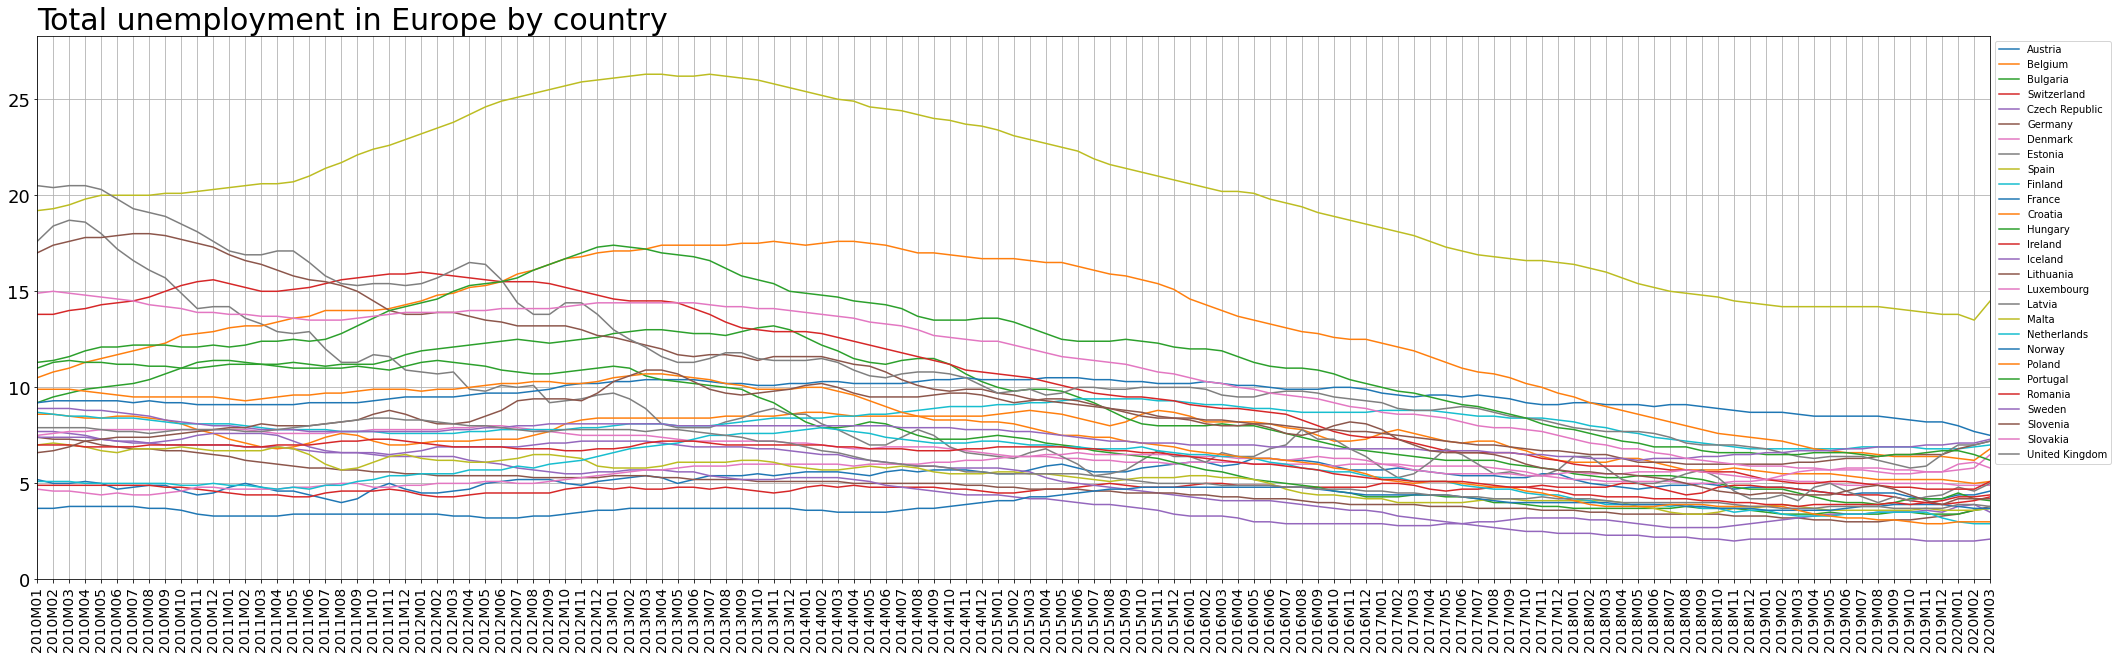

In [12]:
#This function will generate a graph of all countries in data, using the total unemployed people by country.
def allCountries() :
    x_axis = []
    y_axis = []
    tempArray = []

    # X Axis
    for i in range(3,int(len(data.columns))):
        x_axis.append(data.columns[i])
    x_axis = x_axis[::-1] #inverts array so 2010 is in the first position
    
    #Y Axis
    #Creates an array inside Y axis for every single country to later be displayed
    i=2
    for j in range(len(countries["Name"])):
        if data[data.columns[2]][i] == countries["Name"][j]:
            for k in range(3,int(len(data.columns))):
                tempArray.append(float(data[data.columns[k]][i]))
                if k == 125:
                    tempArray = tempArray[::-1]
                    y_axis.append({countries["Name"][j]:tempArray})
                    tempArray = []
            i = i+9 # iterates by 9 so only retrieves the total data, non divided by gender or age group
    
    #Graph setup
    plt.rcParams["figure.figsize"] = (35,10)
    plt.autoscale(tight=True)
    plt.xticks(rotation=90, fontsize=14)
    plt.yticks(fontsize=18)
    plt.grid()
    plt.title(f'Total unemployment in Europe by country', fontsize=30, loc='left')
    for i in range(28):
        plt.plot(x_axis, y_axis[i][countries["Name"][i]])
    plt.legend(["Austria","Belgium","Bulgaria","Switzerland","Czech Republic","Germany","Denmark","Estonia","Spain","Finland","France","Croatia","Hungary","Ireland","Iceland","Lithuania","Luxembourg","Latvia","Malta","Netherlands","Norway","Poland","Portugal","Romania","Sweden","Slovenia","Slovakia","United Kingdom"],loc="upper left",bbox_to_anchor=(1,1))
    axes = plt.gca()
    axes.set_ylim([0,axes.get_ylim()[1]+2])
    plt.show()
allCountries()

<h1>1.Disparity between countries in Europe</h1>
<h2>Lowest and Highest</h2>
The Czech Republic and The Netherlands are the best overall employers in Europe, marking around 2 and 3% in this research. However, Spain and France score very poorly in this subject with 14.5% and 7.5% respectively.<br>
<h2>An overall view of Europe</h2>
The mean of unemployment currently in Europe is 5.25% and currently, 18 of the 28 analysed countries are below this level. That means that almost 36% of the countries analysed are above that average, which is very concerning, as these numbers are driven up from the unemployment between young adults, that are trying to get life started, and more often than not, will move to a different country, that offers better employability.<br>
<h2>Employment in the early years of adult life</h2>
Although the unemployment in total is around 5%, the same for young adults, until 25 years old, is very different, the data reveals that on average 13.5% of the active young people are unemployed.


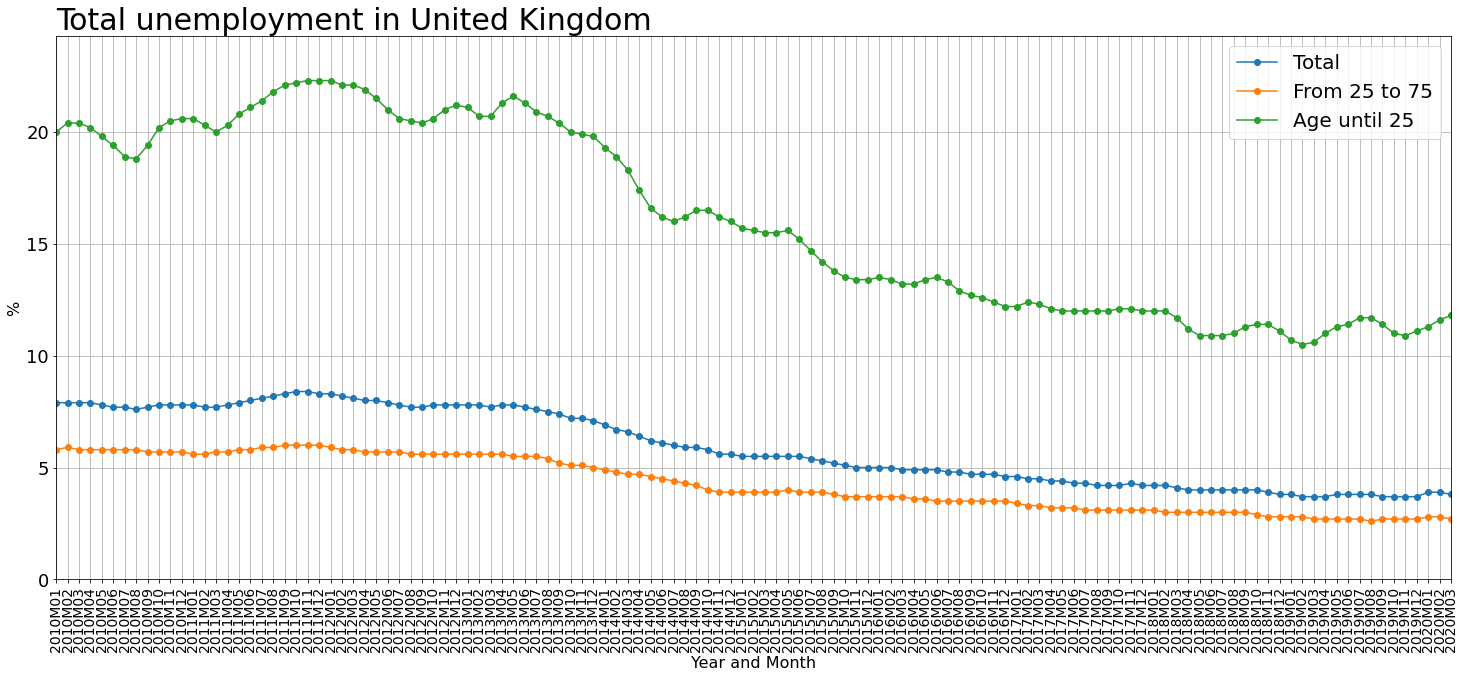

In [18]:
#This function will receive a country name and generate its unemployment graph
def createGraphCountry(country_name):
    x_axis = []
    total_age_total_sex = []
    y_25_to_74_age_total_sex = []
    y_to_25_age_total_sex = []
    #finds country position inside dataset
    for i in range(len(data["COUNTRY"])):
        if data[data.columns[2]][i] == country_name:
            pos = i
            break
    #creates Y axis
    for i in range(3,int(len(data.columns))):
        total_age_total_sex.append(float(data[data.columns[i]][pos+2])) 
        y_25_to_74_age_total_sex.append(float(data[data.columns[i]][pos+5]))
        y_to_25_age_total_sex.append(float(data[data.columns[i]][pos+8]))
    #creates X axis
    for i in range(3,int(len(data.columns))):
        x_axis.append(data.columns[i])

    
    x_axis_np = np.array(x_axis)
    x_axis_np = x_axis_np[::-1]
    
    total_age_total_sex_np = np.array(total_age_total_sex)
    total_age_total_sex_np = total_age_total_sex_np[::-1]
    
    y_25_to_74_age_total_sex_np = np.array(y_25_to_74_age_total_sex)
    y_25_to_74_age_total_sex_np = y_25_to_74_age_total_sex_np[::-1]
    
    y_to_25_age_total_sex_np = np.array(y_to_25_age_total_sex)
    y_to_25_age_total_sex_np = y_to_25_age_total_sex_np[::-1]

    #Graph setup
    plt.rcParams["figure.figsize"] = (25,10)
    plt.autoscale(tight=True)

    plt.xticks(rotation=90, fontsize=14)
    plt.yticks(fontsize=18)

    country = country_name
    lab = ["Total","From 25 to 75","Age until 25"]

    plt.grid()
    plt.xlabel("Year and Month",fontsize=16)
    plt.ylabel("%",fontsize=16)
    plt.title(f'Total unemployment in {country}', fontsize=30, loc='left')

    plt.plot(x_axis_np, total_age_total_sex_np, marker='o')
    plt.plot(x_axis_np, y_25_to_74_age_total_sex_np, marker='o')
    plt.plot(x_axis_np, y_to_25_age_total_sex_np, marker='o')
    plt.legend(lab, loc=1, prop={'size': 20})

    axes = plt.gca()
    axes.set_ylim([0,axes.get_ylim()[1]+2])
    plt.show()
createGraphCountry("United Kingdom")

<h1>2.A closer look into the rates in the United Kingdom</h1>
<h2>Crisis</h2>
<p>The United Kingdom, one of the G7, although not part of the European Union, also appears on this list. We could note from the data that the 2008 financial crisis, where over a million people lost their jobs, had long-lasting effects in the country. The most affected were the young, as thousands of restaurants, pubs, shops were permanently shut. Unemployment levels for active people aged 16-25 reached an all-time high of 22.3% in the middle of 2012
<h2>Recovery</h2>
<p>The UK last reported in early 2020, before the pandemic, an unemployment rate of 3.8%, a great recovery from the 8.4% reported in late 2011.

<h2>Web Scraping</h2>
<p>I have done a web scrap to retrieve data of The United Kingdom’s Human Development Index (HDI) from the last 10 years.
<p>This data will be compared versus the mean of the last 10 years of The United Kingdom’s unemployment rate. 
<p>In the end, we should be able to conclude if both data are related and think about the reasons why. 


In [14]:
#Saves response from the URL to variable
site = "https://datosmacro.expansion.com/idh/uk"
http = urllib3.PoolManager()
back = http.request('GET', site)
sp = BeautifulSoup(back.data,"lxml")

#finds table using BeautifulSoup
data_scrape = sp.find(id="tb0")

idhUK = []
rows = data_scrape.find_all('tr')

for row in rows:
    cols = row.find_all('td')[0:2]#captures the first two td, as they contain the year and the value
    cols = [ele.text.strip() for ele in cols]
    idhUK.append([ele for ele in cols if ele])
idhUK_new = idhUK[1:11] # We will only require the data from 2010 to 2020

Text(0.5, 1.0, 'Human development index - United Kingdom')

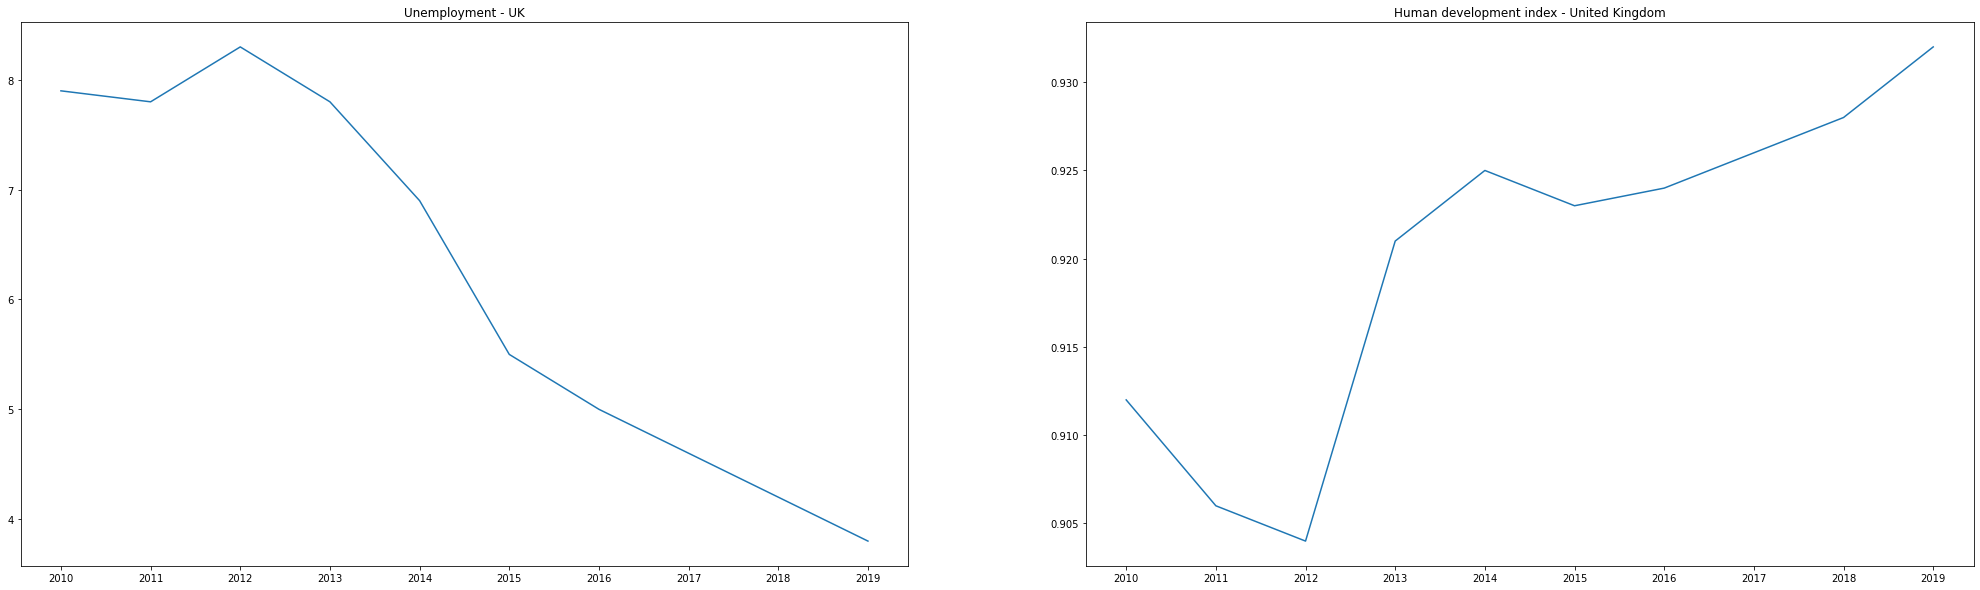

In [15]:
x_axis = []
y_axis = []
total_uk = []

#Create X axis
for i in idhUK_new:
    x_axis.append(i[0])
x_axis = x_axis[::-1]
#Create Y axis with UK data, traverse data 12 by 12 as we only need one entry by year
for i in range(17,126,12):
    total_uk.append(float(data[data.columns[i]][245]))
total_uk = total_uk[::-1]
for i in idhUK_new:
    y_axis.append(float(i[1].replace(',','.')))
y_axis = y_axis[::-1]
#setup graphs
figure, axis = plt.subplots(1,2)
axis[0].plot(x_axis,total_uk)
axis[0].set_title("Unemployment - UK")
axis[1].plot(x_axis,y_axis)
axis[1].set_title("Human development index - United Kingdom")

<h1>3.Making a connection between the Human Development Index and Employment</h1>
<p>Analysing the graph above we are able to identify that when the unemployment rate is increasing the Human Development Index is decreasing. This is easily spotted between the years 2010 and 2012.
<p>From 2012 the unemployment rate starts to decrease and, on the other hand, the HDI increase. 
<p>Between 2014 and 2015 the HDI have a shortfall and, although the unemployment rate doesn’t increase, it starts to decrease slower than how it was before.


<h1>Conclusion</h1>
<p>It is possible to say that the HDI is affected by unemployment, but not just because of monetary reasons, this is only one of the reasons.
<p>Work, or the absence of it, has a strong relationship with mental health. So, being unemployed not only means financial struggle, but also health problems, like depression.
<p>Additionally, in some countries, there are no accessible health systems. And one of the criteria of HDI is about how often the population have access to vaccines, medicines, doctors and so on.
<p>Not being able to find work affects a person living on so many levels that it reflects on the HDI in different ways and it is possible to conclude this by analysing this data.


<h1>References</h1>
<p>[1]. Unemployment in European Union<br>https://www.kaggle.com/gpreda/unemployment-in-european-union
<p>[2]. ISO Country Codes - Global<br>https://www.kaggle.com/andradaolteanu/iso-country-codes-global
<p>[3]. Removing all occurrences of a value from a list<br>https://stackoverflow.com/questions/1157106/remove-all-occurrences-of-a-value-from-a-list